In [15]:
import numpy as np
import pandas as pd

In [16]:
df_cleaned = pd.read_csv('../data/cleaned_data_saudi_used_cars.csv')
df_cleaned.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False


# Features Creation

In [17]:
df_engineered = df_cleaned.copy()

In [18]:
CURRENT_YEAR = 2022
df_engineered['Car_Age'] = CURRENT_YEAR - df_engineered['Year']
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10


In [19]:
df_engineered['IsVintage'] = (df_engineered['Year'] < 2000).astype(int)
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age,IsVintage
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8,0
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10,0


In [20]:
df_engineered['IsBigEngine'] = (df_engineered['Engine_Size'] > 7.0).astype(int)
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Mileage_per_Year,Unnatural_High_Mileage_Flag,Car_Age,IsVintage,IsBigEngine
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,10000.000000,False,8,0,1
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,20000.000000,False,7,0,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,31428.571429,False,7,0,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,8333.333333,False,3,0,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,18900.000000,False,10,0,0


# Feature Selection

In [21]:
df_engineered = df_engineered.drop(columns=['Negotiable', 'Mileage_per_Year', 'Unnatural_High_Mileage_Flag', 'Year'])
df_engineered.head()

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Price,Car_Age,IsVintage,IsBigEngine
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,120000,8,0,1
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,5.0,140000,260000,7,0,0
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,42000,7,0,0
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,58000,3,0,0
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,4.8,189000,85000,10,0,0


Feature importance (to-do later)

# Features Transformation

In [22]:
df_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3801 non-null   object 
 1   Region       3801 non-null   object 
 2   Make         3801 non-null   object 
 3   Gear_Type    3801 non-null   object 
 4   Origin       3801 non-null   object 
 5   Options      3801 non-null   object 
 6   Engine_Size  3801 non-null   float64
 7   Mileage      3801 non-null   int64  
 8   Price        3801 non-null   int64  
 9   Car_Age      3801 non-null   int64  
 10  IsVintage    3801 non-null   int32  
 11  IsBigEngine  3801 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(6)
memory usage: 326.8+ KB


In [23]:
TARGET_VAR = 'Price'
df_engineered['IsVintage']   = df_engineered['IsVintage'].astype('bool')
df_engineered['IsBigEngine'] = df_engineered['IsBigEngine'].astype('bool')

cat_cols = (
    df_engineered
      .select_dtypes(include=['object','bool','category'])
      .columns
      .tolist()
)

num_cols = (
    df_engineered
      .select_dtypes(include=['int64','float64'])
      .drop(columns=[TARGET_VAR])
      .columns
      .tolist()
)

# detect highly-skewed numerics for log1p transform
skewed_cols = [c for c in num_cols if abs(df_engineered[c].skew()) > 1.0]
num_plain = [c for c in num_cols if c not in skewed_cols]

print("Categorical variables:", cat_cols)
print("Numerical variables:", num_cols)
print("Highly skewed variables:", skewed_cols)
print("Target variable:", TARGET_VAR)

Categorical variables: ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
Numerical variables: ['Engine_Size', 'Mileage', 'Car_Age']
Highly skewed variables: ['Mileage', 'Car_Age']
Target variable: Price


In [24]:
print("\n>> category cardinalities:")
for c in cat_cols:
    print(f"   {c:12s}: {df_engineered[c].nunique()} categories")


>> category cardinalities:
   Type        : 319 categories
   Region      : 27 categories
   Make        : 56 categories
   Gear_Type   : 2 categories
   Origin      : 4 categories
   Options     : 3 categories
   IsVintage   : 2 categories
   IsBigEngine : 2 categories


In [25]:
# split them into "low-cardinality" vs "high-cardinality"
LOW_CARD_THRESH = 10
low_card_cat  = [c for c in cat_cols if df_engineered[c].nunique() <= LOW_CARD_THRESH]
high_card_cat = [c for c in cat_cols if df_engineered[c].nunique() >  LOW_CARD_THRESH]

In [26]:
# a quick sanity check
print("\n>> low-cardinal cats:",  low_card_cat)
print(">> high-cardinal cats:", high_card_cat)
print(">> numeric cols:     ",  num_cols)
print(">> skewed cols:     ",  skewed_cols)


>> low-cardinal cats: ['Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
>> high-cardinal cats: ['Type', 'Region', 'Make']
>> numeric cols:      ['Engine_Size', 'Mileage', 'Car_Age']
>> skewed cols:      ['Mileage', 'Car_Age']


# Modeling

In [27]:
# ============================================================================
# 0) Imports & data split
# ============================================================================
from sklearn.model_selection    import train_test_split, KFold, cross_validate, RandomizedSearchCV
from sklearn.compose            import ColumnTransformer
from sklearn.preprocessing      import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline           import Pipeline
from sklearn.linear_model       import ElasticNetCV
from sklearn.ensemble           import RandomForestRegressor
from sklearn.metrics            import make_scorer, mean_absolute_percentage_error
from sklearn.compose            import TransformedTargetRegressor
import category_encoders as ce
from xgboost import XGBRegressor

RANDOM_STATE = 21
TARGET       = "Price"

X = df_engineered.drop(columns=TARGET)
y = df_engineered[TARGET]

# keep 20 % hold-out for the very end
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=None
)

In [ ]:
import numpy as np, pandas as pd
from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base          import BaseEstimator, TransformerMixin
import category_encoders as ce

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# ——————————————————————————————————————————
# Column buckets
# ——————————————————————————————————————————
preproc = ColumnTransformer(
    transformers=[
        ("low", OneHotEncoder(drop="first", handle_unknown="ignore"), low_card_cat),
        ("bin", ce.BinaryEncoder(),                                   high_card_cat),
        ("num", StandardScaler(),                                     num_plain),
        ("log", Pipeline([
                    ("l", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
                    ("s", StandardScaler())]),                        skewed_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ——————————————————————————————————————————
# Models (default params, random_state only)
# ——————————————————————————————————————————
from sklearn.linear_model      import ElasticNet
from sklearn.neighbors         import KNeighborsRegressor
from sklearn.tree              import DecisionTreeRegressor
from sklearn.ensemble          import RandomForestRegressor
from xgboost                   import XGBRegressor
from lightgbm                  import LGBMRegressor
from catboost                  import CatBoostRegressor
from sklearn.compose           import TransformedTargetRegressor

models = {
    "ElasticNet":   ElasticNet(random_state=RANDOM_STATE),
    "KNN":          KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "RandomForest": RandomForestRegressor(random_state=RANDOM_STATE),
    "XGB":          XGBRegressor(random_state=RANDOM_STATE, verbosity=0),
    "LightGBM":     LGBMRegressor(random_state=RANDOM_STATE, verbose=-1),
    "CatBoost":     CatBoostRegressor(random_state=RANDOM_STATE,
                                      logging_level="Silent")
}

cv   = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scor = {"MAE":"neg_mean_absolute_error",
        "MAPE":"neg_mean_absolute_percentage_error",
        "RMSE":"neg_root_mean_squared_error"}

results = []
for name, base_model in models.items():
    pipe = Pipeline([
        ("prep",  preproc),
        ("model", TransformedTargetRegressor(
                     base_model,
                     func=np.log1p, inverse_func=np.expm1))
    ])
    row = {"Model": name}
    for m, scr in scor.items():
        row[m] = -cross_val_score(pipe, X_train, y_train,
                                  cv=cv, scoring=scr).mean()
    results.append(row)

pd.DataFrame(results).sort_values("MAE").reset_index(drop=True)

d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid 

,Model,MAE,MAPE,RMSE
0,CatBoost,18626.780485,0.717870,37335.691148
1,RandomForest,19413.615723,0.802552,40151.424533
2,LightGBM,20146.114744,0.774080,38834.782576
3,XGB,20355.334766,0.724933,39948.325781
4,KNN,21100.427675,0.899226,41214.561339
5,DecisionTree,25942.595994,1.011526,52531.502361
6,ElasticNet,44501.567143,1.234947,76888.907080


In [ ]:
# Best pipeline
best_pipe = Pipeline([
    ("prep",  preproc),
    ("model", TransformedTargetRegressor(
        CatBoostRegressor(random_state=RANDOM_STATE, logging_level="Silent"),
        func=np.log1p, inverse_func=np.expm1))
])

# Fit on train
best_pipe.fit(X_train, y_train)

# Predict on test set
y_pred = best_pipe.predict(X_test)

df_eval = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
}).reset_index(drop=True)

In [ ]:
# bins = list(np.arange(0, 500001, 50000)) + [np.inf]  # Add an upper limit for 500k+
bins = [0, 10000, 35000, 60000, 95000, 300000, np.inf]  # Add an upper limit for 300k+ 
labels = ["0–10k", "10k–35k", "35k–60k", "60k–95k", "95k–300k", "300k+"]  # Add an upper limit for 300k+
# labels = [f"{int(bins[i]/1000)}–{int(bins[i+1]/1000)}k" if bins[i+1] != np.inf else "500k+" for i in range(len(bins)-1)]
df_eval["price_band"] = pd.cut(df_eval["y_true"], bins=bins, labels=labels)

In [52]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

band_stats = (
    df_eval
    .groupby("price_band")
    .apply(lambda g: pd.Series({
        "count": len(g),
        "MAE": np.mean(np.abs(g.y_true - g.y_pred)),
        "MAPE": mape(g.y_true, g.y_pred)
    }))
)
display(band_stats)

C:\Users\User\AppData\Local\Temp\ipykernel_9184\1779149513.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("price_band")
C:\Users\User\AppData\Local\Temp\ipykernel_9184\1779149513.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,count,MAE,MAPE
price_band,,,
0–10k,29.0,30352.917255,16.500007
10k–35k,186.0,5933.276576,0.261816
35k–60k,213.0,10020.295791,0.214423
60k–95k,172.0,15250.568379,0.201256
95k–300k,151.0,31573.013825,0.205957
300k+,10.0,149650.931067,0.299643


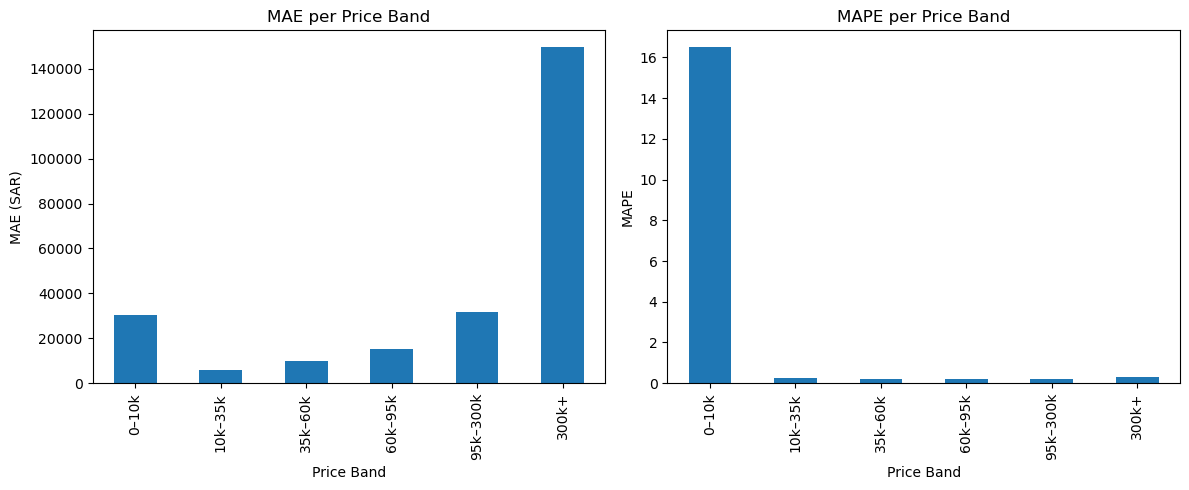

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

band_stats["MAE"].plot(kind="bar", ax=ax[0], title="MAE per Price Band")
ax[0].set_ylabel("MAE (SAR)")
ax[0].set_xlabel("Price Band")

band_stats["MAPE"].plot(kind="bar", ax=ax[1], title="MAPE per Price Band")
ax[1].set_ylabel("MAPE")
ax[1].set_xlabel("Price Band")

plt.tight_layout()
plt.show()

In [ ]:
bands_to_show = ["0–10k", "35k–60k", "95k–300k", "300k+"]
examples = []

for band in bands_to_show:
    band_examples = df_eval[df_eval["price_band"] == band]
    if len(band_examples) > 0:
        # Get 1 example from this price band
        example_idx = band_examples.index[5]
        
        # Get the original index in X_test
        row_idx = X_test.index[example_idx]
        row = X_test.loc[row_idx]
        
        # Get the true price and prediction
        true_price = y_test.loc[row_idx]
        pred = df_eval.loc[example_idx, 'y_pred']
        
        examples.append((band, row, true_price, pred))

for band, row, true_price, pred in examples:
    print(f"\n=== Price Band: {band} ===")
    print("Data row:")
    display(row.to_frame().T)
    print(f"True Price: {true_price}")
    print(f"Predicted Price: {pred:.2f}")


=== Price Band: 0–10k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Car_Age,IsVintage,IsBigEngine
1151,Edge,Jeddah,Ford,Automatic,Saudi,Full,3.6,99000,8,False,False


True Price: 1500
Predicted Price: 68057.88

=== Price Band: 35k–60k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Car_Age,IsVintage,IsBigEngine
3699,Fusion,Dammam,Ford,Automatic,Saudi,Semi Full,2.5,157000,7,False,False


True Price: 47000
Predicted Price: 48301.50

=== Price Band: 95k–300k ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Car_Age,IsVintage,IsBigEngine
2500,Prado,Riyadh,Toyota,Automatic,Saudi,Semi Full,4.0,201000,6,False,False


True Price: 107000
Predicted Price: 103520.10

=== Price Band: 300k+ ===
Data row:


,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Car_Age,IsVintage,IsBigEngine
1170,Range Rover,Dammam,Land Rover,Automatic,Saudi,Full,3.5,38000,3,False,False


True Price: 375000
Predicted Price: 273018.79
